# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [112]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [113]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.23.5
pandas version: 1.5.3
matplotlib version: 3.7.2
seaborn version: 0.12.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [115]:
# Try loading one file

df = pd.read_parquet('yellow_tripdata_2023-01.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [116]:
df.shape

(3066766, 19)

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [117]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [118]:
# from google.colab import drive
# drive.mount('/content/drive')

In [119]:
# # Take a small percentage of entries from each hour of every date.
# # Iterating through the monthly data:
# #   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# # Create a single dataframe for the year combining all the monthly data

# # Select the folder having data files
# import os

# # Select the folder having data files
# os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')

# # Create a list of all the twelve files to read
# file_list = os.listdir()

# # initialise an empty dataframe
# df = pd.DataFrame()


# # iterate through the list of files and sample one by one:
# for file_name in file_list:
#     try:
#         # file path for the current file
#         file_path = os.path.join(os.getcwd(), file_name)

#         # Reading the current file



#         # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
#         # After completing iteration through each date, we will append this data to the final dataframe.
#         sampled_data = pd.DataFrame()

#         # Loop through dates and then loop through every hour of each date

#             # Iterate through each hour of the selected date

#                 # Sample 5% of the hourly data randomly

#                 # add data of this hour to the dataframe

#         # Concatenate the sampled data of all the dates to a single dataframe
#         df = # we initialised this empty DF earlier

#     except Exception as e:
#         print(f"Error reading file {file_name}: {e}")

In [120]:
import glob 
file_path = glob.glob('Yellow_Taxi/*.parquet')
combined_data = pd.DataFrame()
for i in file_path:
    sample_data = pd.DataFrame()
    
    df = pd.read_parquet(i)
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    df = df[df['tpep_pickup_datetime'].dt.year == 2023].copy()
    df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
    
    for i in df['pickup_date'].unique():
        date_data = df[df['pickup_date'] == i]
        for j in range(24):
            hour_data = date_data[date_data['pickup_hour'] == j]
            sample = hour_data.sample(frac = 0.008, random_state= 42)
            sample_data = pd.concat([sample_data, sample])
    combined_data = pd.concat([combined_data, sample_data])
    
combined_data.reset_index(drop = True, inplace = True)
combined_data.shape

(306508, 22)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [121]:
combined_data.shape

(306508, 22)

In [122]:
# Store the df in csv/parquet
combined_data.to_csv('final_data.csv')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [123]:
# Load the new data file
df = pd.read_csv('final_data.csv')

In [124]:
df = df.iloc[:,1:]
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour,Airport_fee
0,2,2023-01-01 00:10:30,2023-01-01 00:11:49,1.0,0.49,1.0,N,239,238,1,...,0.5,1.88,0.00,1.0,11.28,2.5,0.0,2023-01-01,0,NaN
1,2,2023-01-01 00:49:02,2023-01-01 00:55:15,1.0,0.75,1.0,N,45,148,2,...,0.5,0.00,0.00,1.0,12.90,2.5,0.0,2023-01-01,0,NaN
2,1,2023-01-01 00:47:17,2023-01-01 01:07:01,2.0,2.90,1.0,N,142,170,1,...,0.5,4.80,0.00,1.0,28.90,2.5,0.0,2023-01-01,0,NaN
3,2,2023-01-01 00:06:02,2023-01-01 00:31:38,1.0,2.50,1.0,N,43,161,1,...,0.5,7.25,0.00,1.0,36.25,2.5,0.0,2023-01-01,0,NaN
4,2,2023-01-01 00:02:19,2023-01-01 00:30:49,1.0,20.37,2.0,N,132,140,1,...,0.5,12.00,6.55,1.0,92.55,2.5,0.0,2023-01-01,0,NaN


In [125]:
df.shape

(306508, 22)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306508 entries, 0 to 306507
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               306508 non-null  int64  
 1   tpep_pickup_datetime   306508 non-null  object 
 2   tpep_dropoff_datetime  306508 non-null  object 
 3   passenger_count        296344 non-null  float64
 4   trip_distance          306508 non-null  float64
 5   RatecodeID             296344 non-null  float64
 6   store_and_fwd_flag     296344 non-null  object 
 7   PULocationID           306508 non-null  int64  
 8   DOLocationID           306508 non-null  int64  
 9   payment_type           306508 non-null  int64  
 10  fare_amount            306508 non-null  float64
 11  extra                  306508 non-null  float64
 12  mta_tax                306508 non-null  float64
 13  tip_amount             306508 non-null  float64
 14  tolls_amount           306508 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [127]:
# Fix the index and drop any columns that are not needed
df.reset_index(inplace=True, drop=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [128]:
df[['airport_fee', 'Airport_fee']]

,airport_fee,Airport_fee
0,0.0,NaN
1,0.0,NaN
2,0.0,NaN
3,0.0,NaN
4,0.0,NaN
...,...,...
306503,NaN,NaN
306504,NaN,0.0
306505,NaN,0.0
306506,NaN,NaN


In [129]:
df[df['airport_fee'].isna()]['Airport_fee'].unique()

array([  nan,  0.  ,  1.25, -1.25,  1.75, -1.75])

In [130]:
df[df['Airport_fee'].isna()]['airport_fee'].unique()

array([ 0.  ,   nan,  1.25, -1.25])

In [131]:
# Combine the two airport fee columns

df['airport_fee'] = df['Airport_fee'].combine_first(df['airport_fee'])
df.drop(columns=['Airport_fee'], inplace=True)

In [132]:
df['airport_fee'].isna().sum()

10164

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [133]:
# check where values of fare amount are negative

df[df['fare_amount'] < 0]['fare_amount'].unique()


array([-2.300e+01, -1.070e+01, -3.000e+00, -1.490e+01, -1.630e+01,
       -3.700e+00, -1.014e+02, -1.910e+01, -8.560e+01, -1.560e+01,
       -7.900e+00, -1.210e+01, -5.100e+00, -7.200e+00, -2.890e+01,
       -8.600e+00, -2.960e+01, -4.400e+00, -1.000e+01, -5.200e+01,
       -1.420e+01, -2.400e+01, -1.700e+01, -2.120e+01, -1.350e+01,
       -2.050e+01, -2.610e+01, -4.710e+01, -3.940e+01, -7.000e+01,
       -5.800e+00, -1.280e+01, -6.500e+00, -9.300e+00, -2.330e+01,
       -2.750e+01, -1.770e+01, -2.540e+01, -4.500e+01, -2.680e+01,
       -1.980e+01, -5.500e+01, -9.580e+01, -1.140e+01, -4.220e+01,
       -6.000e+01, -1.500e+01, -2.500e+01, -2.820e+01, -8.400e+01,
       -3.450e+01, -5.690e+01, -3.870e+01, -2.190e+01, -2.260e+01,
       -1.050e+01, -2.766e+01, -3.380e+01, -5.830e+01, -3.310e+01,
       -5.760e+01, -8.280e+01, -4.430e+01, -1.840e+01, -3.800e+01,
       -3.000e+02, -3.100e+01, -1.200e+02, -3.170e+01, -3.030e+01,
       -6.180e+01, -5.130e+01, -5.410e+01, -4.080e+01, -4.150e

Did you notice something different in the `RatecodeID` column for above records?

In [134]:
# Analyse RatecodeID for the negative fare amounts

df[df['fare_amount'] < 0]['RatecodeID'].unique()


array([ 3.,  1.,  2.,  5., nan,  4.])

In [135]:
num_cols = df.select_dtypes(include=['number'])
num_cols.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'pickup_hour'],
      dtype='object')

In [136]:
# Find which columns have negative values

chk_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

for col in chk_cols:
    negative_count = (df[col] < 0).sum()
    print(f"Negative values in '{col}': {negative_count}")


Negative values in 'fare_amount': 3058
Negative values in 'extra': 1560
Negative values in 'mta_tax': 2939
Negative values in 'tip_amount': 14
Negative values in 'tolls_amount': 195
Negative values in 'improvement_surcharge': 3021
Negative values in 'total_amount': 3024
Negative values in 'congestion_surcharge': 2427
Negative values in 'airport_fee': 409


In [137]:
# fix these negative values

chk_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


for col in chk_cols:
    df[col] = df[col].mask(df[col] < 0, 0)

In [138]:
chk_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

for col in chk_cols:
    negative_count = (df[col] < 0).sum()
    print(f"Negative values in '{col}': {negative_count}")


Negative values in 'fare_amount': 0
Negative values in 'extra': 0
Negative values in 'mta_tax': 0
Negative values in 'tip_amount': 0
Negative values in 'tolls_amount': 0
Negative values in 'improvement_surcharge': 0
Negative values in 'total_amount': 0
Negative values in 'congestion_surcharge': 0
Negative values in 'airport_fee': 0


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [139]:
# Find the proportion of missing values in each column
missing_values = df.isna()
missing_values.mean()

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.033161
trip_distance            0.000000
RatecodeID               0.033161
store_and_fwd_flag       0.033161
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.033161
airport_fee              0.033161
pickup_date              0.000000
pickup_hour              0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [140]:
# Display the rows with null values
df[df['passenger_count'].isna()]
# Impute NaN values in 'passenger_count'

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour
5,2,2023-01-01 00:45:00,2023-01-01 01:21:00,NaN,6.00,NaN,NaN,234,225,0,...,0.0,0.5,0.00,0.0,1.0,42.77,NaN,NaN,2023-01-01,0
6,2,2023-01-01 00:56:00,2023-01-01 01:08:45,NaN,2.89,NaN,NaN,181,17,0,...,0.0,0.5,3.73,0.0,1.0,22.40,NaN,NaN,2023-01-01,0
38,2,2023-01-01 00:45:00,2023-01-01 01:04:00,NaN,5.25,NaN,NaN,256,162,0,...,0.0,0.5,2.27,0.0,1.0,34.63,NaN,NaN,2023-01-01,0
73,2,2023-01-01 01:45:11,2023-01-01 02:00:49,NaN,6.27,NaN,NaN,209,140,0,...,0.0,0.5,6.66,0.0,1.0,39.97,NaN,NaN,2023-01-01,1
76,2,2023-01-01 01:39:32,2023-01-01 01:51:28,NaN,3.53,NaN,NaN,41,141,0,...,0.0,0.5,4.84,0.0,0.3,29.06,NaN,NaN,2023-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306489,2,2023-12-31 23:36:15,2023-12-31 23:50:18,NaN,3.05,NaN,NaN,141,238,0,...,0.0,0.5,0.00,0.0,1.0,19.95,NaN,NaN,2023-12-31,23
306491,2,2023-12-31 23:35:44,2024-01-01 00:02:29,NaN,16.38,NaN,NaN,81,50,0,...,0.0,0.5,0.00,0.0,1.0,57.75,NaN,NaN,2023-12-31,23
306499,2,2023-12-31 23:15:09,2023-12-31 23:20:56,NaN,0.84,NaN,NaN,42,41,0,...,0.0,0.5,0.00,0.0,1.0,10.08,NaN,NaN,2023-12-31,23
306503,2,2023-12-31 23:38:22,2023-12-31 23:59:53,NaN,8.32,NaN,NaN,170,116,0,...,0.0,0.5,0.00,0.0,1.0,39.40,NaN,NaN,2023-12-31,23


Did you find zeroes in passenger_count? Handle these.

In [141]:
# Yes
df.loc[df['passenger_count'] == 0, 'passenger_count'] = np.nan
df['passenger_count'].unique()

array([ 1.,  2., nan,  3.,  4.,  6.,  5.,  8.])

In [142]:
# Yes I found o's in passenger count so repalcing those values with a NaN value
# So I can impute right values in that

In [143]:
mode_pass = df['passenger_count'].mode()[0]
df['passenger_count'] = df['passenger_count'].fillna(mode_pass)
df['passenger_count'].unique()

array([1., 2., 3., 4., 6., 5., 8.])

In [144]:
df['passenger_count'].value_counts(dropna = False)

1.0    237422
2.0     45257
3.0     11074
4.0      6337
5.0      3839
6.0      2575
8.0         4
Name: passenger_count, dtype: int64

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [145]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].unique()

array([ 1.,  2., nan,  5.,  3.,  4., 99.,  6.])

In [146]:
df['RatecodeID'].value_counts(dropna = False)

1.0     279545
2.0      11782
NaN      10164
5.0       1736
99.0      1663
3.0       1010
4.0        606
6.0          2
Name: RatecodeID, dtype: int64

In [147]:
# Here we can see there are NaN values and also an outlier i.e, 99 which is wrong,
# I think its 6 because inplace of 6 they inserted 99 by mistake by which the values
# of 6 are less

In [148]:
df.loc[df['RatecodeID'] == 99.0, 'RatecodeID'] = 6.0

In [149]:
mode_Rate = df['RatecodeID'].mode()[0]
mode_Rate
df['RatecodeID'] = df['RatecodeID'].fillna(mode_Rate)
df['RatecodeID'].unique()

array([1., 2., 5., 3., 4., 6.])

In [150]:
df['RatecodeID'].value_counts(dropna = False)

1.0    289709
2.0     11782
5.0      1736
6.0      1665
3.0      1010
4.0       606
Name: RatecodeID, dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [151]:
# handle null values in congestion_surcharge

df['congestion_surcharge'].value_counts(dropna = False)


2.5    270741
0.0     25603
NaN     10164
Name: congestion_surcharge, dtype: int64

In [152]:
mode_cong = df['congestion_surcharge'].mode()[0]
mode_cong
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(mode_cong)
df['congestion_surcharge'].unique()

array([2.5, 0. ])

In [153]:
df['congestion_surcharge'].value_counts(dropna = False)


2.5    280905
0.0     25603
Name: congestion_surcharge, dtype: int64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [154]:
# Handle any remaining missing values
df.isna().mean()

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
store_and_fwd_flag       0.033161
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
airport_fee              0.033161
pickup_date              0.000000
pickup_hour              0.000000
dtype: float64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [155]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,306508.0,1.737100,0.444340,1.0,1.00,2.00,2.00,6.00
passenger_count,306508.0,1.374134,0.865643,1.0,1.00,1.00,1.00,8.00
trip_distance,306508.0,4.268698,249.648713,0.0,1.03,1.78,3.40,116439.71
RatecodeID,306508.0,1.100777,0.534494,1.0,1.00,1.00,1.00,6.00
PULocationID,306508.0,165.028864,64.079164,1.0,132.00,162.00,234.00,265.00
DOLocationID,306508.0,163.868222,69.857128,1.0,113.00,162.00,234.00,265.00
payment_type,306508.0,1.186693,0.556497,0.0,1.00,1.00,1.00,4.00
fare_amount,306508.0,19.666519,18.495317,0.0,9.30,13.50,21.90,715.60
extra,306508.0,1.569586,1.825494,0.0,0.00,1.00,2.50,11.75
mta_tax,306508.0,0.490325,0.068897,0.0,0.50,0.50,0.50,0.80


In [156]:
# we can see theres an vendorID with max value 6 which is not should be
# Also theres a passenger_count of 8 which is not true because most of the 
# case the max go to 6 need to analyse on this
# Also Maybe need to check with trip_distance column values

In [157]:
df['VendorID'].value_counts()

2    225647
1     80805
6        56
Name: VendorID, dtype: int64

In [158]:
# only 1 and 2 are valid, so the 6 value is invalid

In [159]:
df['passenger_count'].unique()

array([1., 2., 3., 4., 6., 5., 8.])

In [160]:
df['passenger_count'].value_counts()

1.0    237422
2.0     45257
3.0     11074
4.0      6337
5.0      3839
6.0      2575
8.0         4
Name: passenger_count, dtype: int64

In [161]:
q1 = np.quantile(df['trip_distance'], 0.25)
q3 = np.quantile(df['trip_distance'], 0.75)
iqr = q3 - q1
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
print(q1,q3,iqr,upper_limit,lower_limit)

1.03 3.4 2.37 6.955 -2.5250000000000004


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [162]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]
df['passenger_count'].value_counts()

1.0    237422
2.0     45257
3.0     11074
4.0      6337
5.0      3839
6.0      2575
Name: passenger_count, dtype: int64

In [163]:
# Continue with outlier handling
df['VendorID'].value_counts()


2    225643
1     80805
6        56
Name: VendorID, dtype: int64

In [164]:
df = df[df['VendorID'].isin([1,2])]
df['VendorID'].value_counts()

2    225643
1     80805
Name: VendorID, dtype: int64

In [165]:
# Entries where trip_distance is nearly 0 and fare_amount is more than 300
chk1 = df[(df['trip_distance'] == 0) & (df['fare_amount'] > 300)]
chk1[['trip_distance', 'fare_amount']]

,trip_distance,fare_amount
41037,0.0,320.00
131429,0.0,495.00
161653,0.0,700.00
187739,0.0,382.00
203127,0.0,340.00
208861,0.0,395.00
209184,0.0,330.00
237702,0.0,350.00
251631,0.0,320.00
257289,0.0,322.22


In [166]:
# let removes these entries
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] > 300))]
df[(df['trip_distance'] == 0) & (df['fare_amount'] > 300)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour


In [167]:
# Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
chk2 = df[(df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID'])]
chk2[['trip_distance', 'fare_amount', 'PULocationID', 'DOLocationID']].head()

,trip_distance,fare_amount,PULocationID,DOLocationID
3669,0.0,0.0,138,264
13454,0.0,0.0,161,264
35507,0.0,0.0,193,264
39243,0.0,0.0,234,264
40251,0.0,0.0,193,264


In [168]:
# let removes these entries
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]
df[(df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID'])]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour


In [169]:
# Entries where trip_distance is more than 250 miles
df[df['trip_distance'] > 250]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour
9020,2,2023-01-13 05:53:00,2023-01-13 06:02:00,1.0,116439.71,1.0,NaN,239,230,0,...,0.0,0.5,3.00,0.00,1.0,20.22,2.5,NaN,2023-01-13,5
89201,2,2023-04-14 15:08:37,2023-04-14 15:59:51,1.0,9682.34,1.0,N,132,260,2,...,0.0,0.5,0.00,0.00,1.0,56.30,0.0,0.0,2023-04-14,15
97757,2,2023-04-23 23:23:32,2023-04-23 23:43:40,1.0,1342.94,1.0,N,113,113,1,...,1.0,0.5,0.00,0.00,1.0,28.00,2.5,0.0,2023-04-23,23
152450,2,2023-06-26 18:00:27,2023-06-26 22:45:22,1.0,275.86,5.0,N,42,265,1,...,0.0,0.0,83.15,14.75,1.0,498.90,0.0,0.0,2023-06-26,18
160829,2,2023-07-08 19:02:00,2023-07-08 19:21:00,1.0,17289.24,1.0,NaN,137,100,0,...,0.0,0.5,4.18,0.00,1.0,32.02,2.5,NaN,2023-07-08,19
194756,2,2023-08-22 08:07:00,2023-08-22 08:27:00,1.0,39483.36,1.0,NaN,143,231,0,...,0.0,0.5,4.96,0.00,1.0,38.03,2.5,NaN,2023-08-22,8
222313,2,2023-09-28 15:42:16,2023-09-28 16:03:29,2.0,9674.28,1.0,N,246,230,1,...,0.0,0.5,4.48,0.00,1.0,26.88,2.5,0.0,2023-09-28,15
276798,2,2023-11-27 07:27:00,2023-11-27 07:59:00,1.0,59102.95,1.0,NaN,52,162,0,...,0.0,0.5,3.89,0.00,1.0,42.80,2.5,NaN,2023-11-27,7


In [170]:
# so we can see there are less or neglible row so we can remove them
df = df[~(df['trip_distance'] > 250)]
df[df['trip_distance'] > 250]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour


In [171]:
# Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
df[df['payment_type'] == 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour
5,2,2023-01-01 00:45:00,2023-01-01 01:21:00,1.0,6.00,1.0,NaN,234,225,0,...,0.0,0.5,0.00,0.0,1.0,42.77,2.5,NaN,2023-01-01,0
6,2,2023-01-01 00:56:00,2023-01-01 01:08:45,1.0,2.89,1.0,NaN,181,17,0,...,0.0,0.5,3.73,0.0,1.0,22.40,2.5,NaN,2023-01-01,0
38,2,2023-01-01 00:45:00,2023-01-01 01:04:00,1.0,5.25,1.0,NaN,256,162,0,...,0.0,0.5,2.27,0.0,1.0,34.63,2.5,NaN,2023-01-01,0
73,2,2023-01-01 01:45:11,2023-01-01 02:00:49,1.0,6.27,1.0,NaN,209,140,0,...,0.0,0.5,6.66,0.0,1.0,39.97,2.5,NaN,2023-01-01,1
76,2,2023-01-01 01:39:32,2023-01-01 01:51:28,1.0,3.53,1.0,NaN,41,141,0,...,0.0,0.5,4.84,0.0,0.3,29.06,2.5,NaN,2023-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306489,2,2023-12-31 23:36:15,2023-12-31 23:50:18,1.0,3.05,1.0,NaN,141,238,0,...,0.0,0.5,0.00,0.0,1.0,19.95,2.5,NaN,2023-12-31,23
306491,2,2023-12-31 23:35:44,2024-01-01 00:02:29,1.0,16.38,1.0,NaN,81,50,0,...,0.0,0.5,0.00,0.0,1.0,57.75,2.5,NaN,2023-12-31,23
306499,2,2023-12-31 23:15:09,2023-12-31 23:20:56,1.0,0.84,1.0,NaN,42,41,0,...,0.0,0.5,0.00,0.0,1.0,10.08,2.5,NaN,2023-12-31,23
306503,2,2023-12-31 23:38:22,2023-12-31 23:59:53,1.0,8.32,1.0,NaN,170,116,0,...,0.0,0.5,0.00,0.0,1.0,39.40,2.5,NaN,2023-12-31,23


In [172]:
# So the payment type o is not ddefine we will be removing these rows
df = df[~(df['payment_type'] == 0)]
df[df['payment_type'] == 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour


In [173]:
# Do any columns need standardising?

# As we are not going to do any model training or ML so we can neglect this satge


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [174]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_date',
 'pickup_hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296298 entries, 0 to 306507
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               296298 non-null  int64  
 1   tpep_pickup_datetime   296298 non-null  object 
 2   tpep_dropoff_datetime  296298 non-null  object 
 3   passenger_count        296298 non-null  float64
 4   trip_distance          296298 non-null  float64
 5   RatecodeID             296298 non-null  float64
 6   store_and_fwd_flag     296298 non-null  object 
 7   PULocationID           296298 non-null  int64  
 8   DOLocationID           296298 non-null  int64  
 9   payment_type           296298 non-null  int64  
 10  fare_amount            296298 non-null  float64
 11  extra                  296298 non-null  float64
 12  mta_tax                296298 non-null  float64
 13  tip_amount             296298 non-null  float64
 14  tolls_amount           296298 non-nu

In [176]:
# Categorical - VendorID, RatecodeID, PULocationID, DOLocationID, payment_type

# Numerical - fare_amount, extra, mta_tax, tip_amount, tolls_amount,
#             improvement_surcharge, total_amount, congestion_surcharge, 
#             airport_fee, tpep_pickup_datetime, tpep_dropoff_datetime, 
#             passenger_count, trip_distance, trip_duration, pickup_hour

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

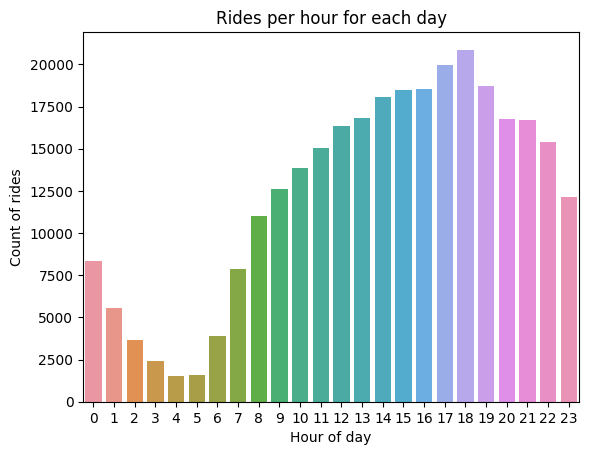

In [177]:
# Find and show the hourly trends in taxi pickups
hr_data = df.groupby('pickup_hour').agg(cnt=('pickup_hour', 'count')).reset_index()
sns.barplot(hr_data, x = 'pickup_hour', y = 'cnt')
plt.title('Rides per hour for each day')
plt.xlabel('Hour of day')
plt.ylabel('Count of rides')
plt.show()

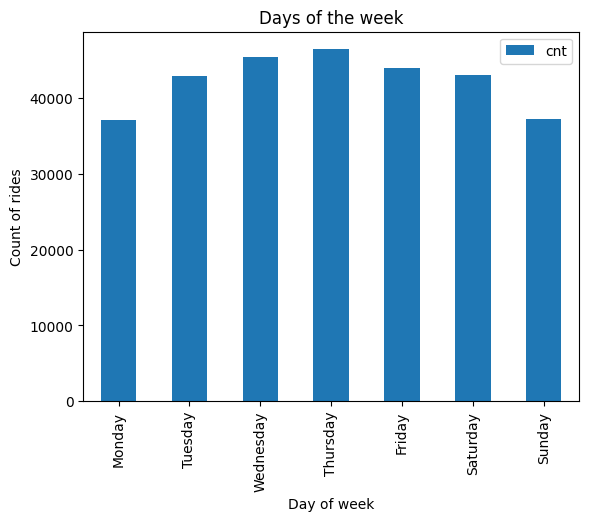

In [178]:
# Find and show the daily trends in taxi pickups (days of the week)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
t1 = df['tpep_pickup_datetime'].dt.day_name().reset_index()
t1_df = t1.groupby('tpep_pickup_datetime').agg(cnt = ('tpep_pickup_datetime', 'count'))
t1_df.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot.bar()
plt.title('Days of the week')
plt.xlabel('Day of week')
plt.ylabel('Count of rides')
plt.show()

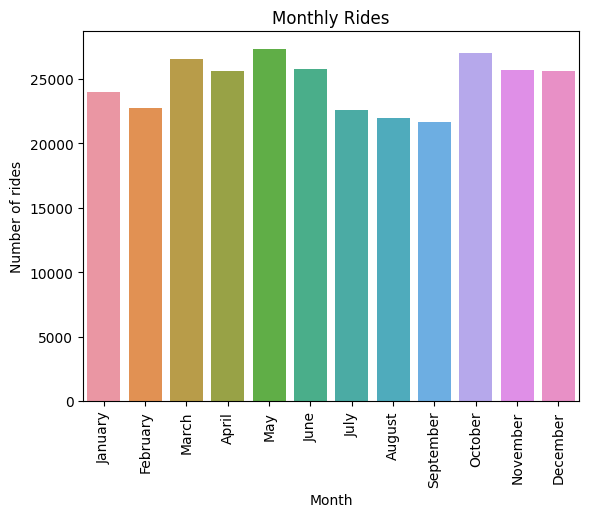

In [179]:
# Show the monthly trends in pickups

month_data = df['tpep_pickup_datetime'].dt.month.reset_index()
t1 = month_data.groupby('tpep_pickup_datetime').agg(cnt = ('tpep_pickup_datetime', 'count'))
t1 = t1.reset_index().rename(columns = {'tpep_pickup_datetime' : 'month'})
t1['month'] =  t1['month'].replace({1 : 'January', 2 :'February', 3:'March' , 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})
sns.barplot(t1, x = 'month', y ='cnt')
plt.title('Monthly Rides')
plt.xlabel('Month')
plt.ylabel('Number of rides')
plt.xticks(rotation=90)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [180]:
# Analyse the above parameters
chk_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for i in chk_cols:
    cnt = (df[i] == 0).sum()
    print(f"Zeros in '{i}': {cnt}")


Zeros in 'fare_amount': 3085
Zeros in 'tip_amount': 68498
Zeros in 'total_amount': 3050
Zeros in 'trip_distance': 3988


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [181]:
# Yes it is

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [182]:
# Maybe this are the short distiances
df[df['trip_distance'] == 0][['fare_amount', 'trip_distance']]

,fare_amount,trip_distance
48,3.7,0.0
68,35.0,0.0
96,0.0,0.0
149,30.0,0.0
193,40.0,0.0
...,...,...
306058,50.0,0.0
306060,89.0,0.0
306123,3.0,0.0
306299,7.9,0.0


In [183]:
# Create a df with non zero entries for the selected parameters.
filter_df = df[(df['fare_amount'] > 0) & (df['tip_amount'] > 0) & (df['total_amount'] > 0) & (df['trip_distance'] > 0)]
filter_df


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour
0,2,2023-01-01 00:10:30,2023-01-01 00:11:49,1.0,0.49,1.0,N,239,238,1,...,1.0,0.5,1.88,0.00,1.0,11.28,2.5,0.0,2023-01-01,0
2,1,2023-01-01 00:47:17,2023-01-01 01:07:01,2.0,2.90,1.0,N,142,170,1,...,3.5,0.5,4.80,0.00,1.0,28.90,2.5,0.0,2023-01-01,0
3,2,2023-01-01 00:06:02,2023-01-01 00:31:38,1.0,2.50,1.0,N,43,161,1,...,1.0,0.5,7.25,0.00,1.0,36.25,2.5,0.0,2023-01-01,0
4,2,2023-01-01 00:02:19,2023-01-01 00:30:49,1.0,20.37,2.0,N,132,140,1,...,0.0,0.5,12.00,6.55,1.0,92.55,2.5,0.0,2023-01-01,0
7,2,2023-01-01 00:13:54,2023-01-01 00:21:26,1.0,2.03,1.0,N,142,75,1,...,1.0,0.5,3.14,0.00,1.0,18.84,2.5,0.0,2023-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306501,2,2023-12-31 23:31:33,2023-12-31 23:52:27,1.0,4.79,1.0,N,90,25,1,...,1.0,0.5,5.94,0.00,1.0,35.64,2.5,0.0,2023-12-31,23
306502,2,2023-12-31 23:21:51,2023-12-31 23:28:58,2.0,1.83,1.0,N,148,137,1,...,1.0,0.5,3.00,0.00,1.0,18.00,2.5,0.0,2023-12-31,23
306504,2,2023-12-31 23:54:57,2024-01-01 00:03:59,5.0,2.65,1.0,N,79,256,1,...,1.0,0.5,4.80,0.00,1.0,24.00,2.5,0.0,2023-12-31,23
306505,1,2023-12-31 23:23:18,2023-12-31 23:38:10,4.0,2.10,1.0,N,137,144,1,...,3.5,0.5,3.95,0.00,1.0,23.85,2.5,0.0,2023-12-31,23


In [184]:
filter_df.to_csv('filter_df.csv', index = False)
filter_df = pd.read_csv('filter_df.csv', parse_dates = ['tpep_pickup_datetime', 'tpep_dropoff_datetime'])
filter_df.shape

(226381, 21)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

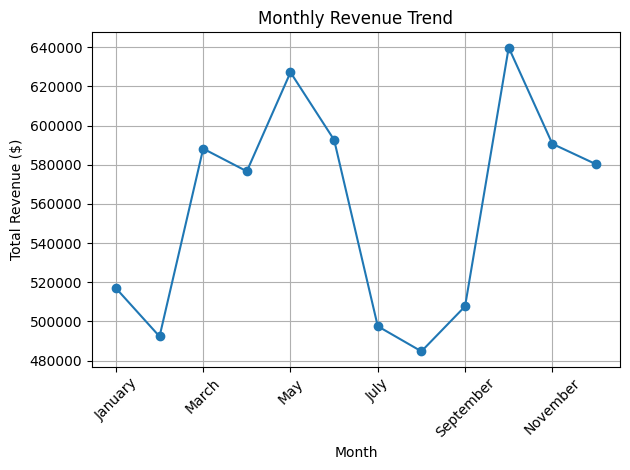

In [185]:
filter_df['Month'] = filter_df['tpep_pickup_datetime'].dt.month

filter_df['Month'] = filter_df['Month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

mth1 = filter_df.groupby('Month')['total_amount'].sum()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

mth1 = mth1.reindex(month_order)

mth1.plot(kind='line', marker = 'o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [186]:
# Calculate proportion of each quarter
filter_df['quarter'] = filter_df['tpep_pickup_datetime'].dt.to_period('Q')

quart = filter_df.groupby('quarter', observed=True)['total_amount'].sum()
rev_proportion = (quart / quart.sum()) * 100
print(rev_proportio)


quarter
2023Q1    23.862132
2023Q2    26.834327
2023Q3    22.255668
2023Q4    27.047872
Freq: Q-DEC, Name: total_amount, dtype: float64


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

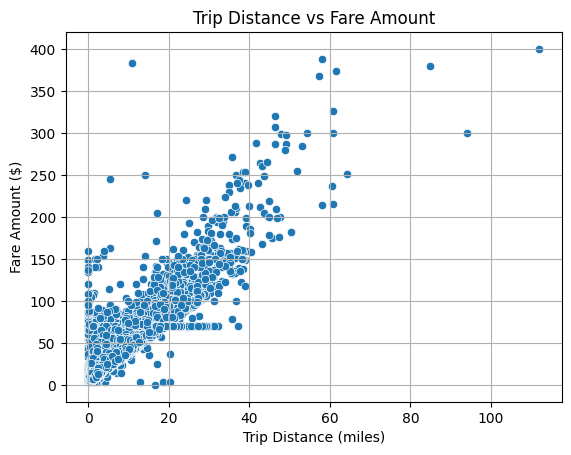

In [187]:
# Show how trip fare is affected by distance
sns.scatterplot(filter_df, x='trip_distance', y='fare_amount')
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()


In [188]:
# the Correlation is strong within trip_distance and fare_amount
filter_df['trip_distance'].corr(filter_df['fare_amount'])

0.9499915768708569

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

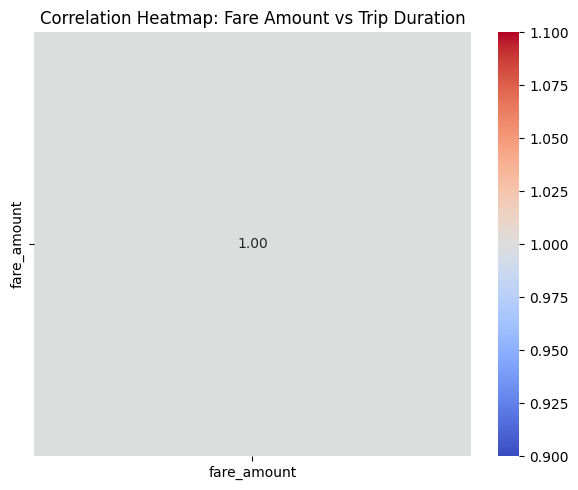

In [189]:
# Show relationship between fare and trip duration
filter_df.loc[:,'trip_duration'] = filter_df['tpep_dropoff_datetime'] - filter_df['tpep_pickup_datetime']
correlation = filter_df[['fare_amount', 'trip_duration']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Fare Amount vs Trip Duration")
plt.tight_layout()
plt.show()


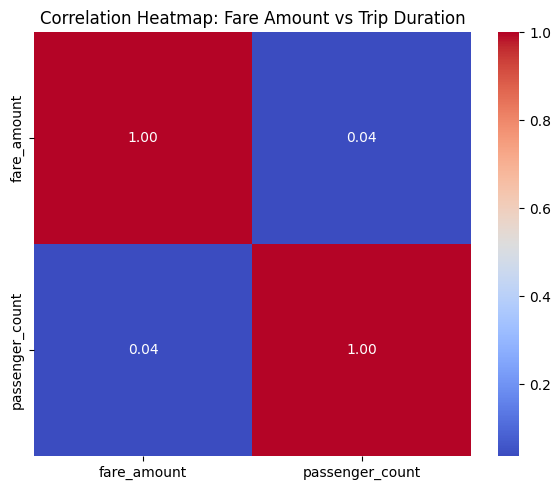

In [190]:
# Show relationship between fare and number of passengers
correlation = filter_df[['fare_amount', 'passenger_count']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Fare Amount vs Trip Duration")
plt.tight_layout()
plt.show()


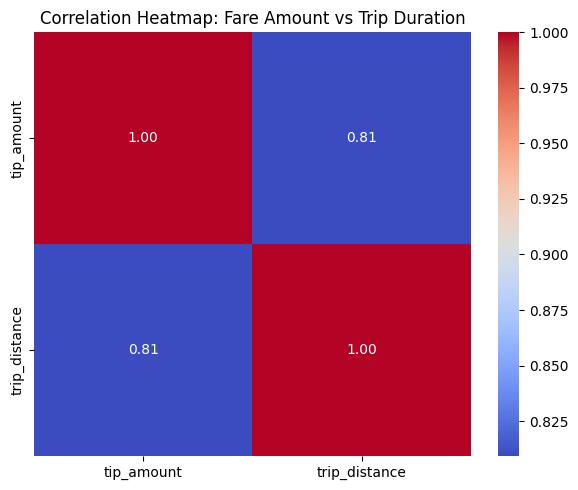

In [191]:
# Show relationship between tip and trip distance

correlation = filter_df[['tip_amount', 'trip_distance']].corr()
# print(f"Correlation between number of passengers and fare_amount: {correlation:.4f}")
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Fare Amount vs Trip Duration")
plt.tight_layout()
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [192]:
# Analyse the distribution of different payment types (payment_type).
payment_cnt = filter_df['payment_type'].value_counts().sort_index()
print(payment_cnt)
#  Mapping
payment_type = {1: 'Credit Card', 2: 'Cash', 3: 'No Charge', 4: 'Dispute',
    5: 'Unknown', 6: 'Voided Trip'}

payment_cnt.index = payment_cnt.index.map(payment_type)

payment_cnt


1    226378
2         3
Name: payment_type, dtype: int64


Credit Card    226378
Cash                3
Name: payment_type, dtype: int64

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [193]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [194]:
import geopandas as gpd
shapefile_path = r"C:\Users\96655\Downloads\2 Starter Notebook - EDA NYC Taxi\taxi_zones\taxi_zones.shp"

# Read the shapefile using geopandas
zones = gpd.read_file(shapefile_path)
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

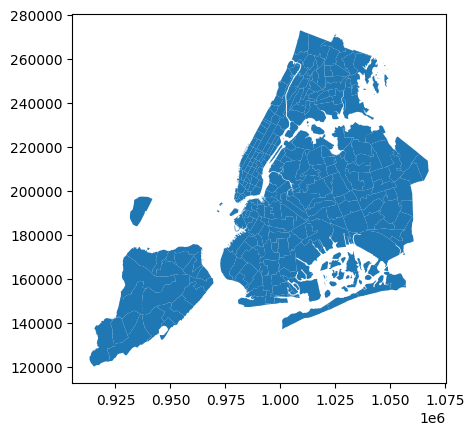

In [195]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [196]:
# Merge zones and trip records using locationID and PULocationID
merged_zones_df = pd.merge(filter_df, zones, how='left', left_on='PULocationID', right_on='LocationID')
merged_zones_df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,Month,quarter,trip_duration,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:10:30,2023-01-01 00:11:49,1.0,0.49,1.0,N,239,238,1,...,January,2023Q1,0 days 00:01:19,239.0,0.063626,0.000205,Upper West Side South,239.0,Manhattan,"POLYGON ((991168.979 226252.992, 991955.565 22..."
1,1,2023-01-01 00:47:17,2023-01-01 01:07:01,2.0,2.90,1.0,N,142,170,1,...,January,2023Q1,0 days 00:19:44,142.0,0.038176,0.000076,Lincoln Square East,142.0,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21..."
2,2,2023-01-01 00:06:02,2023-01-01 00:31:38,1.0,2.50,1.0,N,43,161,1,...,January,2023Q1,0 days 00:25:36,43.0,0.099739,0.000380,Central Park,43.0,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21..."
3,2,2023-01-01 00:02:19,2023-01-01 00:30:49,1.0,20.37,2.0,N,132,140,1,...,January,2023Q1,0 days 00:28:30,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."
4,2,2023-01-01 00:13:54,2023-01-01 00:21:26,1.0,2.03,1.0,N,142,75,1,...,January,2023Q1,0 days 00:07:32,142.0,0.038176,0.000076,Lincoln Square East,142.0,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [197]:
# Group data by location and calculate the number of trips
pickup_cnts = merged_zones_df.groupby('LocationID').size().reset_index(name='trip_count')
pickup_cnts = pickup_cnts.sort_values(by='trip_count', ascending=False)
pickup_cnts.head()


,LocationID,trip_count
143,237.0,11150
97,161.0,10694
75,132.0,10235
142,236.0,10220
98,162.0,8336


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [198]:
# Merge trip counts back to the zones GeoDataFrame

merge_trips = pd.merge(zones, pickup_cnts, how='left', left_on='LocationID', right_on='LocationID')
merge_trips.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",8.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",NaN
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",NaN
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",217.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",NaN


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

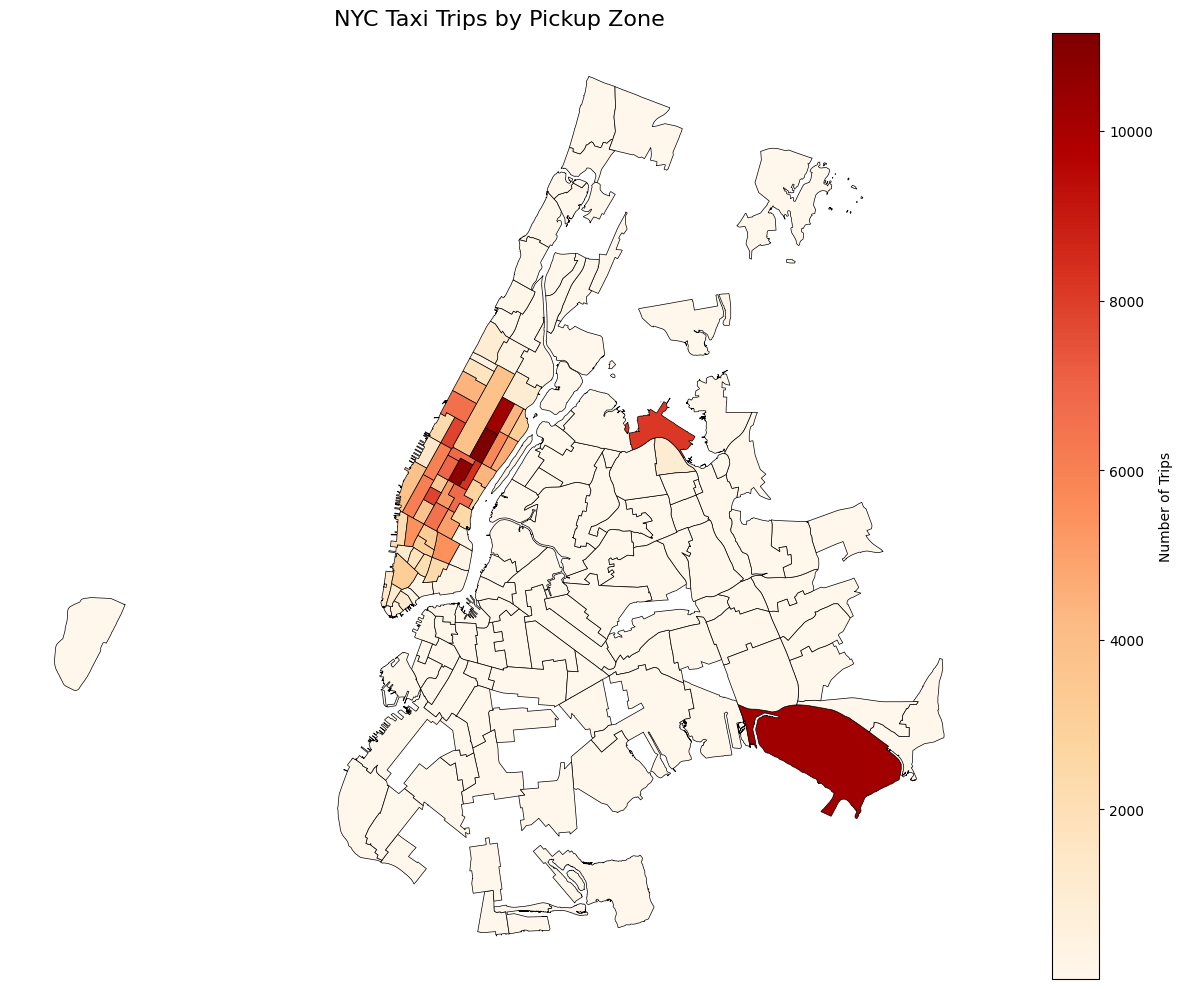

In [199]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(13, 10))

# Plot the map and display it
merge_trips.plot(
    column='trip_count',              # Data to color by
    ax=ax,                            # Axis to draw on
    legend=True,                      # Show color legend
    cmap='OrRd',                      # Color palette
    legend_kwds={
        'label': "Number of Trips",
        'orientation': "vertical"
    },
    edgecolor='black',                # Outline for each zone
    linewidth=0.5                     # Border thickness
)

# Step 6: Clean up and display
ax.set_title('NYC Taxi Trips by Pickup Zone', fontsize=16)
ax.axis('off')  # Hide axes
plt.tight_layout()
plt.show()


In [200]:
# can you try displaying the zones DF sorted by the number of trips?

merge_trips.sort_values(by='trip_count', ascending=False)

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",11150.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",10694.0
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",10235.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",10220.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",8336.0
...,...,...,...,...,...,...,...,...
249,250,0.079626,0.000241,Westchester Village/Unionport,250,Bronx,"POLYGON ((1026991.885 245048.502, 1027255.054 ...",NaN
250,251,0.137711,0.000626,Westerleigh,251,Staten Island,"POLYGON ((947868.004 169247.734, 948000.981 16...",NaN
251,252,0.158004,0.001025,Whitestone,252,Queens,"POLYGON ((1033946.683 231157.996, 1033973.166 ...",NaN
253,254,0.085886,0.000360,Williamsbridge/Olinville,254,Bronx,"POLYGON ((1025214.477 259577.301, 1025348.099 ...",NaN


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [201]:
# Find routes which have the slowest speeds at different times of the day
filter_df['trp_dur_min'] = (filter_df['tpep_dropoff_datetime'] - filter_df['tpep_pickup_datetime']).dt.total_seconds() / 60

route_stats = filter_df.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg({'trp_dur_min': 'mean', 'trip_distance': 'mean'}).reset_index()

route_stats['avg_speed_mph'] = (route_stats['trip_distance'] / route_stats['trp_dur_min']) * 60


route_stats = route_stats[(route_stats['trp_dur_min'] > 0) & (route_stats['avg_speed_mph'] < 100)]

# Top slowest routes
slow_routes_df = route_stats.sort_values(by='avg_speed_mph').head(10)
slow_routes_df

,PULocationID,DOLocationID,pickup_hour,trp_dur_min,trip_distance,avg_speed_mph
11310,100,43,15,1424.450000,1.380000,0.058128
14751,114,113,12,462.650000,0.463333,0.060089
52569,262,238,11,1392.316667,1.810000,0.077999
4,1,264,11,6.883333,0.010000,0.087167
42675,233,43,22,1415.766667,2.140000,0.090693
15950,125,170,17,1396.200000,2.520000,0.108294
32187,163,89,19,54.233333,0.100000,0.110633
2089,43,141,11,484.016667,1.050000,0.130161
41414,231,40,23,1405.033333,3.180000,0.135797
35317,170,143,11,1423.266667,3.260000,0.137430


In [202]:
pickup_merged_data = pd.merge(slow_routes_df, zones, how='left', left_on='PULocationID', right_on='LocationID')

pickup_merged_data = pickup_merged_data.rename(columns={'zone': 'Pickupzone'})

pickup_merged_dropoff_locs = pd.merge(pickup_merged_data, zones, how='left', left_on='DOLocationID', right_on='LocationID')

pickup_merged_dropoff_locs = pickup_merged_dropoff_locs.rename(columns={'zone': 'Dropoffzone'})

pickup_merged_dropoff_locs.loc[:, ["PULocationID", "Pickupzone", "DOLocationID", "Dropoffzone", "pickup_hour", "trp_dur_min",
                            "trip_distance", "avg_speed_mph"
                           ]].sort_values('avg_speed_mph', ascending=False)[0:10]

,PULocationID,Pickupzone,DOLocationID,Dropoffzone,pickup_hour,trp_dur_min,trip_distance,avg_speed_mph
9,170,Murray Hill,143,Lincoln Square West,11,1423.266667,3.260000,0.137430
8,231,TriBeCa/Civic Center,40,Carroll Gardens,23,1405.033333,3.180000,0.135797
7,43,Central Park,141,Lenox Hill West,11,484.016667,1.050000,0.130161
6,163,Midtown North,89,Flatbush/Ditmas Park,19,54.233333,0.100000,0.110633
5,125,Hudson Sq,170,Murray Hill,17,1396.200000,2.520000,0.108294
4,233,UN/Turtle Bay South,43,Central Park,22,1415.766667,2.140000,0.090693
3,1,Newark Airport,264,NaN,11,6.883333,0.010000,0.087167
2,262,Yorkville East,238,Upper West Side North,11,1392.316667,1.810000,0.077999
1,114,Greenwich Village South,113,Greenwich Village North,12,462.650000,0.463333,0.060089
0,100,Garment District,43,Central Park,15,1424.450000,1.380000,0.058128


How does identifying high-traffic, high-demand routes help us?

In [203]:
# Helps in finding alternative routes

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

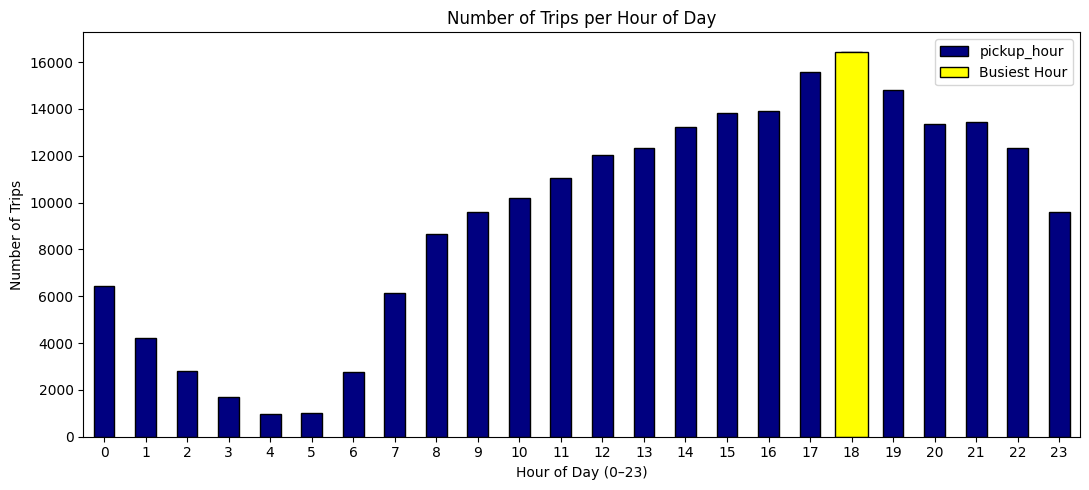

In [204]:
# Visualise the number of trips per hour and find the busiest hour
filter_df['pickup_hour'] = filter_df['tpep_pickup_datetime'].dt.hour
trips_per_hour = filter_df['pickup_hour'].value_counts().sort_index()

busiest_hour = trips_per_hour.idxmax()
busiest_count = trips_per_hour.max()

plt.figure(figsize=(11, 5))
trips_per_hour.plot(kind='bar', color='navy', edgecolor='black')
plt.title('Number of Trips per Hour of Day')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)

# Highlighting busiest hour
plt.bar(busiest_hour, busiest_count, color='yellow', edgecolor='black', label='Busiest Hour')
plt.legend()

plt.tight_layout()
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [205]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_frac = 0.008

trips_per_hour = filter_df['pickup_hour'].value_counts().sort_values(ascending=False)

top5_sample = trips_per_hour.head(5)
top5_actual = (top5_sample / sample_frac).astype(int)


print("Estimated number of trips in the 5 busiest hours:")
print(top5_actual)


Estimated number of trips in the 5 busiest hours:
18    2056375
17    1945625
19    1853875
16    1737125
15    1728000
Name: pickup_hour, dtype: int32


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [206]:
filter_df['day_of_week'] = filter_df['tpep_pickup_datetime'].dt.day_name()

['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
['Sunday' 'Saturday']


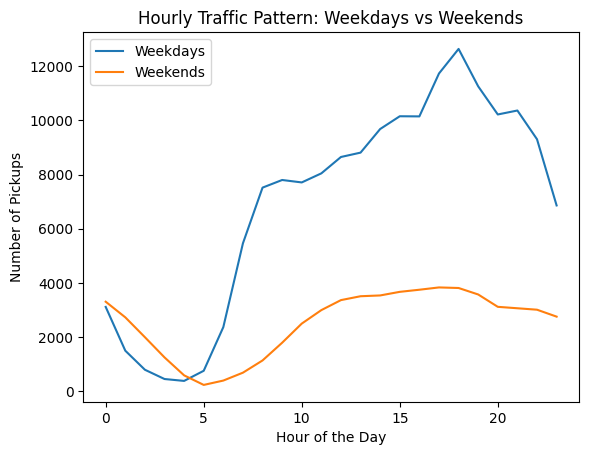

In [207]:
# Compare traffic trends for the week days and weekends

weekdays = filter_df[~(filter_df['day_of_week'].isin(['Saturday', 'Sunday']))]
print(weekdays['day_of_week'].unique())
weekends = filter_df[(filter_df['day_of_week'].isin(['Saturday', 'Sunday']))]
print(weekends['day_of_week'].unique())


weekday_df = weekdays.groupby(['pickup_hour']).size()
weekend_df = weekends.groupby(['pickup_hour']).size()

weekday_df.plot(kind='line', label='Weekdays', title='Hourly Traffic Pattern: Weekdays vs Weekends')
weekend_df.plot(kind='line', label='Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.legend()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [208]:
# Find top 10 pickup and dropoff zones
pickup_df = filter_df.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='counts')
pickup_df.sort_values('counts', ascending=False)[0:10]


,PULocationID,pickup_hour,counts
1215,161,17,973
1216,161,18,944
1797,237,17,851
1798,237,18,835
1214,161,16,833
1217,161,19,829
1771,236,15,826
1795,237,15,821
1794,237,14,811
1774,236,18,804


In [209]:
merged_pickup_df = pd.merge(pickup_df, zones, how='left', left_on='PULocationID', right_on='LocationID')
pickups_plot = merged_pickup_df.loc[:, ["PULocationID", "zone", "pickup_hour", "counts"]].sort_values('counts', ascending=False)[0:10]
pickups_plot

,PULocationID,zone,pickup_hour,counts
1219,161,Midtown Center,17,973
1220,161,Midtown Center,18,944
1801,237,Upper East Side South,17,851
1802,237,Upper East Side South,18,835
1218,161,Midtown Center,16,833
1221,161,Midtown Center,19,829
1775,236,Upper East Side North,15,826
1799,237,Upper East Side South,15,821
1798,237,Upper East Side South,14,811
1778,236,Upper East Side North,18,804


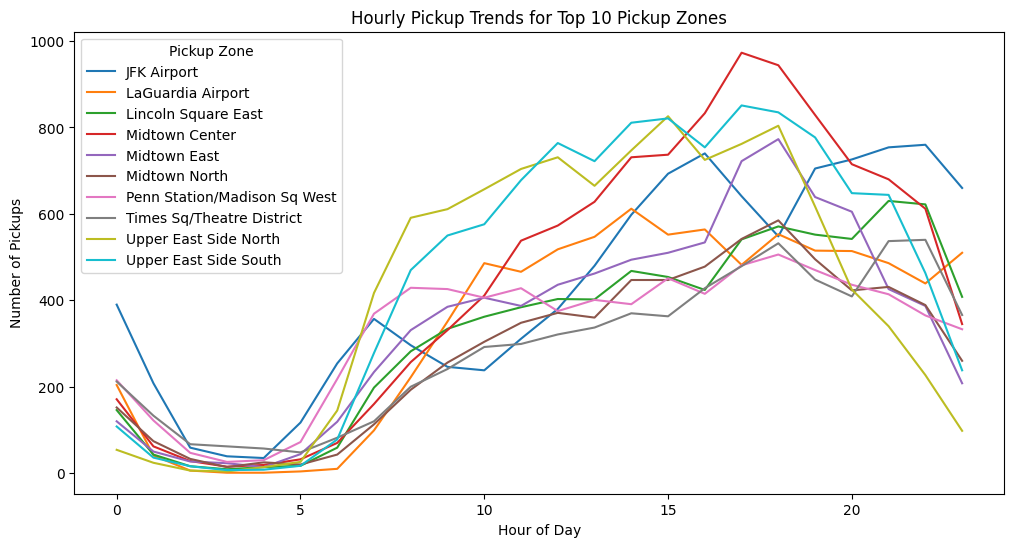

In [210]:
# Top 10 pickup zones overall

top_10 = filter_df['PULocationID'].value_counts().head(10).index
pickup_trends = pickup_df[pickup_df['PULocationID'].isin(top_10)]
pickup_trends = pd.merge(pickup_trends, zones, how='left', left_on='PULocationID', right_on='LocationID')

plt.figure(figsize=(12,6))
sns.lineplot(data=pickup_trends, x='pickup_hour', y='counts', hue='zone')
plt.title('Hourly Pickup Trends for Top 10 Pickup Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.legend(title='Pickup Zone')
plt.show()

In [211]:
pickup_df

,PULocationID,pickup_hour,counts
0,1,0,1
1,1,11,1
2,1,13,1
3,1,14,1
4,1,17,4
...,...,...,...
2089,265,19,1
2090,265,20,1
2091,265,21,1
2092,265,22,3


In [212]:
dropoff = filter_df.groupby(['DOLocationID', 'pickup_hour']).size().reset_index(name='counts')
dropoff.sort_values('counts', ascending=False)[0:10]

,DOLocationID,pickup_hour,counts
3483,236,17,804
3508,237,18,803
3481,236,15,794
3505,237,15,785
3507,237,17,779
3482,236,16,767
3502,237,12,757
3504,237,14,755
3484,236,18,748
2350,161,8,747


In [213]:
merged_dropoff = pd.merge(dropoff, zones, how='left', left_on='DOLocationID', right_on='LocationID')
dropoffs_plot = merged_dropoff.loc[:, ["DOLocationID", "zone", "pickup_hour", "counts"]].sort_values('counts', ascending=False)[0:10]
dropoffs_plot

,DOLocationID,zone,pickup_hour,counts
3499,236,Upper East Side North,17,804
3524,237,Upper East Side South,18,803
3497,236,Upper East Side North,15,794
3521,237,Upper East Side South,15,785
3523,237,Upper East Side South,17,779
3498,236,Upper East Side North,16,767
3518,237,Upper East Side South,12,757
3520,237,Upper East Side South,14,755
3500,236,Upper East Side North,18,748
2366,161,Midtown Center,8,747


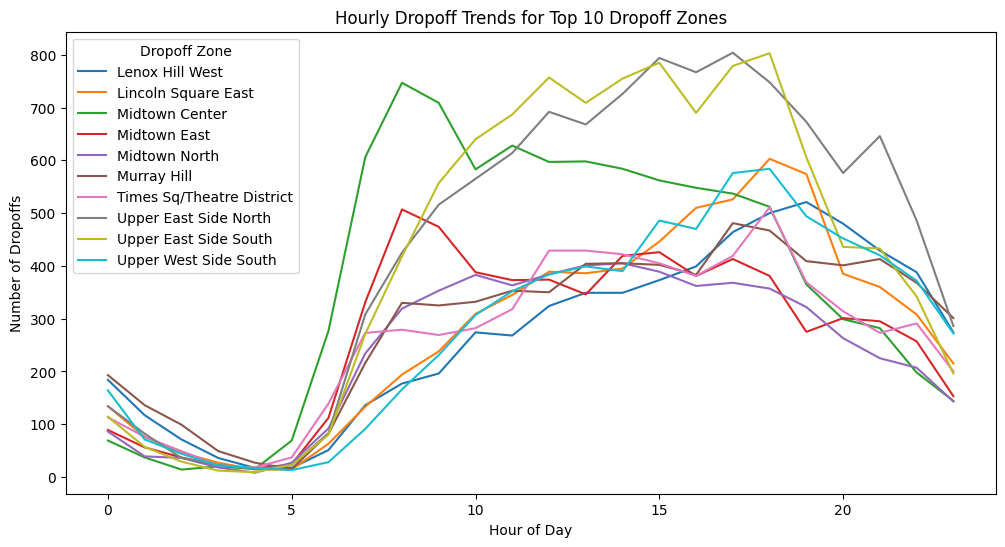

In [214]:
# Top 10 dropoff zones overall
top_dropoff_zones = filter_df['DOLocationID'].value_counts().head(10).index
dropoff_plot = dropoff[dropoff['DOLocationID'].isin(top_dropoff_zones)]
dropoff_plot = pd.merge(dropoff_plot, zones, how='left', left_on='DOLocationID', right_on='LocationID')

plt.figure(figsize=(12,6))
sns.lineplot(data=dropoff_plot, x='pickup_hour', y='counts', hue='zone')
plt.title('Hourly Dropoff Trends for Top 10 Dropoff Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs')
plt.legend(title='Dropoff Zone')
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [215]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_cnts = filter_df.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_cnts = filter_df.groupby('DOLocationID').size().reset_index(name='dropoff_count')

merge_ratio = pd.merge(pickup_cnts, dropoff_cnts, left_on='PULocationID', right_on='DOLocationID', how='outer')

merge_ratio['pickup_count'] = merge_ratio['pickup_count'].fillna(0)
merge_ratio['dropoff_count'] = merge_ratio['dropoff_count'].fillna(0)

merge_ratio['zone_id'] = merge_ratio['PULocationID'].combine_first(merge_ratio['DOLocationID'])

merge_ratio['pickup_dropoff_ratio'] = merge_ratio['pickup_count'] / (merge_ratio['dropoff_count'] + 1e-6)

merge_ratio = pd.merge(merge_ratio, zones, left_on='zone_id', right_on='LocationID', how='left')

top10 = merge_ratio.sort_values('pickup_dropoff_ratio', ascending=False).head(10)
bottom10 = merge_ratio.sort_values('pickup_dropoff_ratio').head(10)

print("Top 10 Pickup/Dropoff Ratios by Zone:")
top10[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']]


Top 10 Pickup/Dropoff Ratios by Zone:


,zone,pickup_count,dropoff_count,pickup_dropoff_ratio
109,Pelham Bay Park,1.0,0.0,1000000.000000
41,East Elmhurst,1030.0,89.0,11.573034
76,JFK Airport,10235.0,2172.0,4.712247
82,LaGuardia Airport,8183.0,2838.0,2.883369
127,South Jamaica,24.0,11.0,2.181818
123,Saint Michaels Cemetery/Woodside,4.0,2.0,1.999999
110,Penn Station/Madison Sq West,7826.0,4733.0,1.653497
24,Central Park,3847.0,2736.0,1.406067
152,West Village,5482.0,4069.0,1.347260
65,Greenwich Village South,3130.0,2354.0,1.329652


In [216]:
print("Bottom 10 Pickup/Dropoff Ratios by Zone:")
bottom10[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']]

Bottom 10 Pickup/Dropoff Ratios by Zone:


,zone,pickup_count,dropoff_count,pickup_dropoff_ratio
254,Woodlawn/Wakefield,0.0,16.0,0.0
188,Crotona Park,0.0,2.0,0.0
189,Crotona Park East,0.0,9.0,0.0
190,Crown Heights South,0.0,75.0,0.0
191,Douglaston,0.0,25.0,0.0
192,East Flatbush/Farragut,0.0,30.0,0.0
193,East Flatbush/Remsen Village,0.0,18.0,0.0
194,East Flushing,0.0,11.0,0.0
195,East New York/Pennsylvania Avenue,0.0,7.0,0.0
196,East Tremont,0.0,6.0,0.0


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [217]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hrs = [23, 0, 1, 2, 3, 4, 5]
night_df = filter_df[filter_df['pickup_hour'].isin(night_hrs)]


night_pickups = (night_df.groupby('PULocationID').size().reset_index(name='night_pickup_count'))

night_dropoffs = (night_df.groupby('DOLocationID').size().reset_index(name='night_dropoff_count'))

night_traffic = pd.merge(night_pickups, night_dropoffs, left_on='PULocationID', right_on='DOLocationID', how='outer')

night_traffic['zone_id'] = night_traffic['PULocationID'].fillna(night_traffic['DOLocationID'])
night_traffic['night_pickup_count'] = night_traffic['night_pickup_count'].fillna(0)
night_traffic['night_dropoff_count'] = night_traffic['night_dropoff_count'].fillna(0)

night_traffic['total_night_traffic'] = night_traffic['night_pickup_count'] + night_traffic['night_dropoff_count']

night_traffic = pd.merge(night_traffic, zones, left_on='zone_id', right_on='LocationID', how='left')

top_night_zones = night_traffic.sort_values('total_night_traffic', ascending=False).head(10)

print("Top 10 Zones with Highest Nighttime Traffic (11PM–5AM):")
top_night_zones[['zone', 'night_pickup_count', 'night_dropoff_count', 'total_night_traffic']]


Top 10 Zones with Highest Nighttime Traffic (11PM–5AM):


,zone,night_pickup_count,night_dropoff_count,total_night_traffic
31,East Village,2026.0,1085.0,3111.0
110,West Village,1682.0,637.0,2319.0
19,Clinton East,1324.0,826.0,2150.0
64,Lower East Side,1281.0,550.0,1831.0
51,JFK Airport,1508.0,171.0,1679.0
42,Gramercy,776.0,795.0,1571.0
27,East Chelsea,752.0,720.0,1472.0
98,Times Sq/Theatre District,945.0,515.0,1460.0
45,Greenwich Village South,1153.0,305.0,1458.0
77,Murray Hill,515.0,820.0,1335.0


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [218]:
# Filter for night hours (11 PM to 5 AM)

night_hours = [23, 0, 1, 2, 3, 4, 5]
day_hours = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

# Filter nighttime and daytime data
nighttime = filter_df[filter_df['pickup_hour'].isin(night_hours)]
daytime = filter_df[filter_df['pickup_hour'].isin(day_hours)]

nighttime_rev = nighttime['total_amount'].sum()
daytime_rev = daytime['total_amount'].sum()

total_rev = nighttime_rev + daytime_rev

nighttime_share = nighttime_rev / total_rev * 100
daytime_share = daytime_rev / total_rev * 100

print(f"Nighttime Revenue Share: {nighttime_share:.2f}%")
print(f"Daytime Revenue Share: {daytime_share:.2f}%")


Nighttime Revenue Share: 11.91%
Daytime Revenue Share: 88.09%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [219]:
# Analyse the fare per mile per passenger for different passenger counts

filter_df['fare_per_mile'] = filter_df['fare_amount'] / filter_df['trip_distance']
filter_df['fare_per_mile_per_passenger'] = filter_df['fare_per_mile'] / filter_df['passenger_count']

avg_fare_per_passenger = filter_df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

avg_fare_per_passenger

,passenger_count,fare_per_mile_per_passenger
0,1.0,9.473483
1,2.0,5.315040
2,3.0,3.123607
3,4.0,5.190874
4,5.0,1.528467
5,6.0,1.444646


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [220]:
# Compare the average fare per mile for different days and for different times of the day

filter_df['fare_per_mile'] = filter_df['fare_amount'] / filter_df['trip_distance']

avg_fare_by_hour = filter_df.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()

avg_fare_by_day = filter_df.groupby('day_of_week')['fare_per_mile'].mean().reset_index()

print("Average Fare per Mile by Hour of the Day:")
average_fare_by_hour

Average Fare per Mile by Hour of the Day:


,pickup_hour,fare_per_mile
0,0,11.189570
1,1,8.711307
2,2,8.061900
3,3,6.414344
4,4,6.907816
5,5,13.852808
6,6,7.025393
7,7,10.811484
8,8,8.800985
9,9,8.790727


In [221]:
print("Average Fare per Mile by Day of the Week:")
average_fare_by_day

Average Fare per Mile by Day of the Week:


,day_of_week,fare_per_mile
0,Friday,10.137182
1,Monday,9.493494
2,Saturday,9.606342
3,Sunday,10.803116
4,Thursday,10.252630
5,Tuesday,8.862925
6,Wednesday,9.646161


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [222]:
# Compare fare per mile for different vendors
filter_df['fare_per_mile'] = filter_df['fare_amount'] / filter_df['trip_distance']
avg_fare_by_vendor_hour = filter_df.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()

print("Average Fare per Mile by Vendor and Hour of the Day:")
avg_fare_by_vendor_hour

Average Fare per Mile by Vendor and Hour of the Day:


,VendorID,pickup_hour,fare_per_mile
0,1,0,7.063835
1,1,1,6.493414
2,1,2,6.710253
3,1,3,6.140762
4,1,4,6.218896
5,1,5,5.732341
6,1,6,6.364808
7,1,7,7.045882
8,1,8,8.179172
9,1,9,8.715617


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [223]:
# Defining distance tiers

filter_df['fare_per_mile'] = filter_df['fare_amount'] / filter_df['trip_distance']


conditions = [
    (filter_df['trip_distance'] <= 2),         
    (filter_df['trip_distance'] > 2) & (filter_df['trip_distance'] <= 5),
    (filter_df['trip_distance'] > 5)            
]

labels = ['Up to 2 miles', '2 to 5 miles', 'Above 5 miles']

filter_df['distance_range'] = pd.cut(filter_df['trip_distance'], bins=[0, 2, 5, float('inf')], labels=labels)

avg_fare_by_vendor_range = filter_df.groupby(['VendorID', 'distance_range'])['fare_per_mile'].mean().reset_index()

print("Average Fare per Mile by Vendor and Distance Range:")
avg_fare_by_vendor_range


Average Fare per Mile by Vendor and Distance Range:


,VendorID,distance_range,fare_per_mile
0,1,Up to 2 miles,9.529371
1,1,2 to 5 miles,6.380985
2,1,Above 5 miles,4.472091
3,2,Up to 2 miles,14.397374
4,2,2 to 5 miles,6.541789
5,2,Above 5 miles,4.509111


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [224]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

filter_df['tip_percentage'] = (filter_df['tip_amount'] / filter_df['fare_amount']) * 100


conditions = [
    (filter_df['trip_distance'] <= 2),          
    (filter_df['trip_distance'] > 2) & (filter_df['trip_distance'] <= 5),  
    (filter_df['trip_distance'] > 5)             
]

labels = ['Up to 2 miles', '2 to 5 miles', 'Above 5 miles']

filter_df['distance_range'] = pd.cut(filter_df['trip_distance'], bins=[0, 2, 5, float('inf')], labels=labels)


avg_tip_by_distance = filter_df.groupby('distance_range')['tip_percentage'].mean().reset_index()
avg_tip_by_passenger_count = filter_df.groupby('passenger_count')['tip_percentage'].mean().reset_index()
avg_tip_by_pickup_hour = filter_df.groupby('pickup_hour')['tip_percentage'].mean().reset_index()


print("Average Tip Percentage by Distance Range:")
avg_tip_by_distance

Average Tip Percentage by Distance Range:


,distance_range,tip_percentage
0,Up to 2 miles,28.832842
1,2 to 5 miles,23.105484
2,Above 5 miles,27.403933


In [225]:
print("\nAverage Tip Percentage by Passenger Count:")
avg_tip_by_passenger_count


Average Tip Percentage by Passenger Count:


,passenger_count,tip_percentage
0,1.0,26.163565
1,2.0,25.837933
2,3.0,25.915778
3,4.0,26.118427
4,5.0,93.141945
5,6.0,26.057074


In [226]:
print("\nAverage Tip Percentage by Pickup Hour:")
avg_tip_by_pickup_hour


Average Tip Percentage by Pickup Hour:


,pickup_hour,tip_percentage
0,0,26.143074
1,1,26.197218
2,2,26.376706
3,3,26.281860
4,4,26.885663
5,5,25.907776
6,6,25.528139
7,7,24.992870
8,8,24.989239
9,9,25.443643


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [227]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

filter_df['tip_percentage'] = (filter_df['tip_amount'] / filter_df['fare_amount']) * 100

low_tip_trips = filter_df[filter_df['tip_percentage'] < 10]
high_tip_trips = filter_df[filter_df['tip_percentage'] > 25]

low_tip_avg_distance = low_tip_trips['trip_distance'].mean()
high_tip_avg_distance = high_tip_trips['trip_distance'].mean()

low_tip_avg_passenger_count = low_tip_trips['passenger_count'].mean()
high_tip_avg_passenger_count = high_tip_trips['passenger_count'].mean()

low_tip_avg_pickup_hour = low_tip_trips['pickup_hour'].mean()
high_tip_avg_pickup_hour = high_tip_trips['pickup_hour'].mean()

low_tip_avg_fare = low_tip_trips['fare_amount'].mean()
high_tip_avg_fare = high_tip_trips['fare_amount'].mean()

print("Comparison of Trips with Low Tip Percentage (< 10%) vs. High Tip Percentage (> 25%)")

print("\nAverage Trip Distance:")
print(f"Low Tip Trips: {low_tip_avg_distance:.2f} miles")
print(f"High Tip Trips: {high_tip_avg_distance:.2f} miles")

print("\nAverage Passenger Count:")
print(f"Low Tip Trips: {low_tip_avg_passenger_count:.2f} passengers")
print(f"High Tip Trips: {high_tip_avg_passenger_count:.2f} passengers")

print("\nAverage Pickup Hour:")
print(f"Low Tip Trips: {low_tip_avg_pickup_hour:.2f} hour")
print(f"High Tip Trips: {high_tip_avg_pickup_hour:.2f} hour")

print("\nAverage Fare Amount:")
print(f"Low Tip Trips: ${low_tip_avg_fare:.2f}")
print(f"High Tip Trips: ${high_tip_avg_fare:.2f}")


Comparison of Trips with Low Tip Percentage (< 10%) vs. High Tip Percentage (> 25%)

Average Trip Distance:
Low Tip Trips: 4.90 miles
High Tip Trips: 2.30 miles

Average Passenger Count:
Low Tip Trips: 1.37 passengers
High Tip Trips: 1.37 passengers

Average Pickup Hour:
Low Tip Trips: 14.04 hour
High Tip Trips: 14.60 hour

Average Fare Amount:
Low Tip Trips: $26.43
High Tip Trips: $14.42


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [228]:
# See how passenger count varies across hours and days

passenger_pivot = filter_df.pivot_table(index='day_of_week', columns='pickup_hour',
    values='passenger_count', aggfunc='mean')

passenger_pivot

pickup_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Friday,1.357642,1.413547,1.317610,1.416216,1.546296,1.250000,1.229885,1.246006,1.263658,1.305332,...,1.395769,1.396450,1.389197,1.379159,1.418325,1.462875,1.448294,1.493348,1.499269,1.467998
Monday,1.345055,1.374429,1.330275,1.492537,1.291667,1.330935,1.221739,1.319171,1.284178,1.298441,...,1.353448,1.383214,1.352105,1.326628,1.329498,1.350273,1.325727,1.361011,1.387549,1.316583
Saturday,1.437614,1.492063,1.505061,1.439580,1.324723,1.295238,1.350467,1.297521,1.396411,1.379668,...,1.464166,1.479544,1.494342,1.528950,1.491647,1.505419,1.484561,1.500289,1.485477,1.494124
Sunday,1.456456,1.477273,1.437624,1.501466,1.332288,1.295455,1.369565,1.285276,1.330171,1.409639,...,1.491728,1.503159,1.455703,1.454647,1.451425,1.395469,1.425087,1.436051,1.425806,1.426250
Thursday,1.295815,1.365625,1.413580,1.247059,1.404762,1.205128,1.166987,1.292785,1.258880,1.266308,...,1.343870,1.378116,1.331442,1.326725,1.332352,1.312344,1.378318,1.405834,1.387822,1.344507
Tuesday,1.366584,1.355263,1.305882,1.730769,1.258065,1.258503,1.234273,1.265638,1.281518,1.247292,...,1.329369,1.363054,1.368345,1.326658,1.296594,1.331126,1.338795,1.332095,1.361157,1.351868
Wednesday,1.321555,1.387097,1.430894,1.318182,1.576271,1.307190,1.190283,1.259167,1.286490,1.268989,...,1.340737,1.349551,1.337857,1.307503,1.311168,1.316667,1.319511,1.332621,1.369223,1.317037


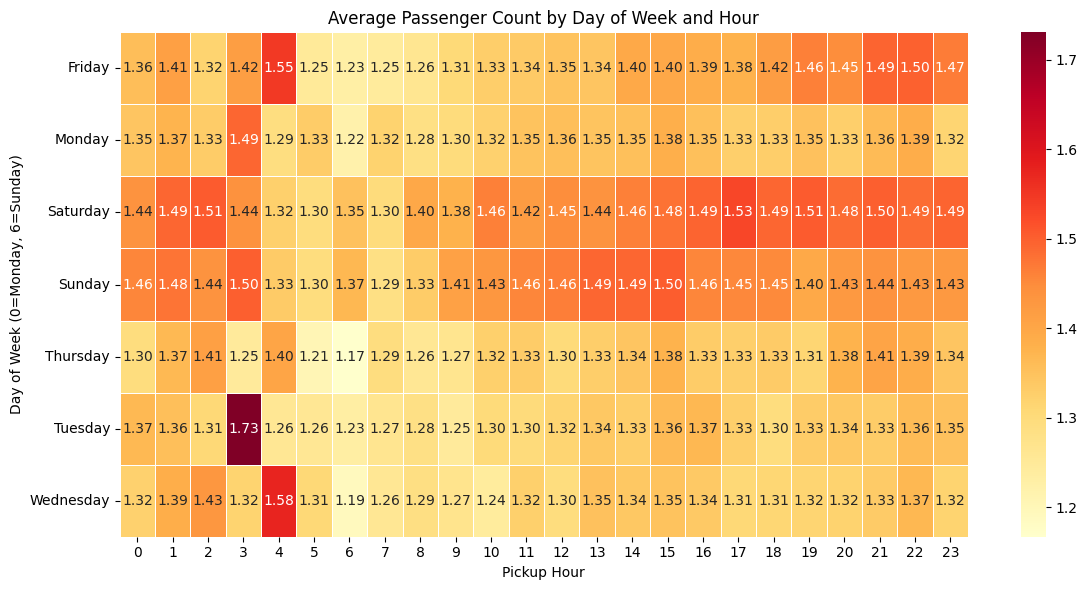

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(passenger_pivot, annot=True, fmt=".2f", cmap="YlOrRd", linewidths=.5)
plt.title('Average Passenger Count by Day of Week and Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Day of Week (0=Monday, 6=Sunday)')
plt.tight_layout()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [230]:
# How does passenger count vary across zones
sliced_with_zones = filter_df.merge(zones, how='left', left_on='PULocationID', right_on='LocationID')

zone_passenger_counts = sliced_with_zones.groupby('zone')['passenger_count'].mean().reset_index()
zone_passenger_counts_sorted = zone_passenger_counts.sort_values(by='passenger_count', ascending=False)

zone_passenger_counts_sorted.head(10)

,zone,passenger_count
19,Canarsie,5.0
57,Fresh Meadows,4.0
156,Woodhaven,4.0
65,Highbridge,3.5
135,Sunset Park West,3.5
105,Ocean Hill,3.0
103,Newark Airport,2.0
119,Riverdale/North Riverdale/Fieldston,2.0
116,Rego Park,2.0
68,Howard Beach,2.0


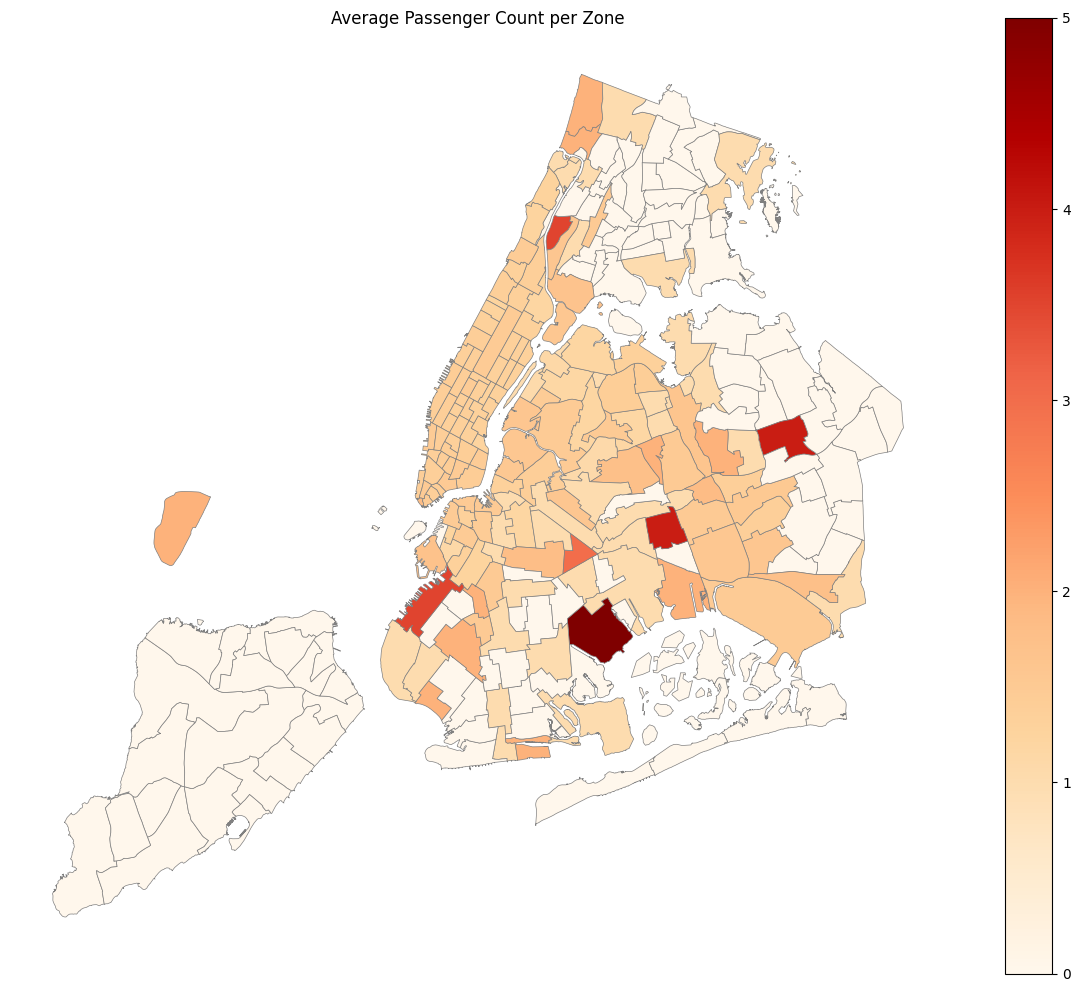

In [231]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_counts = filter_df.groupby('PULocationID')['passenger_count'].mean().reset_index()
merged_zones_trips = zones.merge(avg_passenger_counts, how='left', left_on='LocationID', right_on='PULocationID')
merged_zones_trips['passenger_count'].fillna(0, inplace=True)

fig, ax = plt.subplots(figsize=(12, 10))
merged_zones_trips.plot(
    column='passenger_count',
    cmap='OrRd',
    legend=True,
    linewidth=0.5,
    edgecolor='gray',
    ax=ax
)
ax.set_title('Average Passenger Count per Zone')
plt.axis('off')
plt.tight_layout()
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

In [232]:
# Function to show how often each fee is applied (non-zero values)
def get_charge_prevalence(df, column):
    extra_applied = (filter_df[column] > 0).mean() * 100
    return f"Percentage of trips with an {column} charge: {extra_applied:.2f}%"

print("Extra:")
print(get_charge_prevalence(filter_df, 'extra'))

print("\nMTA Tax:")
print(get_charge_prevalence(filter_df, 'mta_tax'))

print("\nImprovement Surcharge:")
print(get_charge_prevalence(filter_df, 'improvement_surcharge'))

print("\nTolls:")
print(get_charge_prevalence(filter_df, 'tolls_amount'))

print("\nCongestion Surcharge:")
print(get_charge_prevalence(filter_df, 'congestion_surcharge'))

print("\nAirport Fee:")
print(get_charge_prevalence(filter_df, 'airport_fee'))


Extra:
Percentage of trips with an extra charge: 63.31%

MTA Tax:
Percentage of trips with an mta_tax charge: 99.41%

Improvement Surcharge:
Percentage of trips with an improvement_surcharge charge: 100.00%

Tolls:
Percentage of trips with an tolls_amount charge: 8.08%

Congestion Surcharge:
Percentage of trips with an congestion_surcharge charge: 94.88%

Airport Fee:
Percentage of trips with an airport_fee charge: 8.20%


**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [233]:
# How often is each surcharge applied?

# pickup zone
pickup_with_zone = filter_df.merge(zones, how='left', left_on='PULocationID', right_on='LocationID')

zone_extra_stats = pickup_with_zone.groupby('zone').agg(
    total_count=('extra', 'count'),
    extra_applied_count=('extra', lambda x: (x > 0).sum())
).reset_index()

zone_extra_stats['percent_with_extra'] = (zone_extra_stats['extra_applied_count'] / zone_extra_stats['total_count']) * 100
zone_extra_stats = zone_extra_stats.sort_values(by='extra_applied_count', ascending=False)

zone_extra_stats.head()

,zone,total_count,extra_applied_count,percent_with_extra
80,LaGuardia Airport,8183,8090,98.863497
96,Midtown Center,10694,7065,66.065083
143,Upper East Side South,11150,6490,58.206278
142,Upper East Side North,10220,5362,52.465753
97,Midtown East,8336,5235,62.799904


In [234]:
# dropoff zone

dropoff_with_zone = filter_df.merge(zones, how='left', left_on='DOLocationID', right_on='LocationID')

dropoff_zone_extra_stats = dropoff_with_zone.groupby('zone').agg(
    total_count=('extra', 'count'),
    extra_applied_count=('extra', lambda x: (x > 0).sum())
).reset_index()

dropoff_zone_extra_stats['percent_with_extra'] = (dropoff_zone_extra_stats['extra_applied_count'] / dropoff_zone_extra_stats['total_count']) * 100
dropoff_zone_extra_stats = dropoff_zone_extra_stats.sort_values(by='extra_applied_count', ascending=False)

dropoff_zone_extra_stats.head()


,zone,total_count,extra_applied_count,percent_with_extra
223,Upper East Side North,10689,6330,59.219759
224,Upper East Side South,10188,5636,55.319984
151,Midtown Center,9000,4661,51.788889
226,Upper West Side South,6805,4357,64.026451
160,Murray Hill,6941,4345,62.599049


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

### Dispatch and Routing Optimization Using Demand Trends

## Key Observations:

**Daily Patterns:**

- Morning peak (7–9 AM) and evening peak (5–7 PM) show high demand.
- Low activity from 12–4 AM.

**Weekly Trends:**

- Wednesday to Friday have higher ride volumes.
- Weekend evenings/nights spike due to social activities.

**Seasonal Insights:**
- Sept–Nov is peak season.
- Q4 (Oct–Dec) drives 27% of annual revenue.
- July–Aug sees a demand dip.

------------------------------------------------------------------------

**Strategic Recommendations:**

**Time-Based Dispatch:**
- Boost driver availability during peak hours; reduce during low-demand windows.

**Route Optimization:**

- Use historical and real-time traffic data to avoid congestion.

**Seasonal Fleet Scaling:**

- Increase fleet and driver incentives in Q4; retain drivers with bonuses in Q3.

**Predictive Modeling:**

- Use demand trends in algorithms to pre-position vehicles effectively.

------------------------------------------------------------------------

**Optimization Approaches:**

**Dynamic Routing:**

- Adapt to live traffic to reduce delays during peak times.

**Dispatch Strategy:**

- Focus on short trips during rush hours; prioritize longer trips in off-peak hours.

**Proactive Forecasting:**

- Pre-position vehicles in high-demand zones; leverage ML for accurate predictions.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

### Key Findings from Data Analysis

**High-Demand Zones:**

- **Top Pickup Areas:** LaGuardia Airport, Midtown Center, Upper East Side (North/South), Midtown East.

- **Top Drop-off Areas:** Upper East Side, Midtown Center, Upper West Side South, Murray Hill.

**Late-Night Patterns:**

- Active zones from 11 PM to 5 AM include nightlife-heavy areas with bars and clubs.

**Strategic Recommendations**

**1. Zone-Specific Dispatching:**

- Airport Strategy: Increase driver presence near LaGuardia and JFK during peak arrival times (6–9 AM, 7–10 PM).

- Midtown & UES: Deploy more vehicles from 3–8 PM to match commute and social demand.

**2. Heatmap-Driven Positioning:**

- Use real-time and historical data to generate hourly demand heatmaps.

- Guide drivers to high-request areas at optimal times.

**3. Late-Night Strategy:**

- Focus on East Village, Midtown, Uptown from 11 PM to 3 AM.

- Adjust driver shifts based on historical pickup trends.

**4. Pickup-Dropoff Balance:**

- Identify zones with pickup-dropoff imbalances.

- Redirect idle vehicles to high-pickup areas to optimize coverage.

**5. Implementation Tactics:**

- Tech Integration: Embed heatmaps and live data into driver apps.

- Driver Incentives: Bonuses for covering hotspots or night shifts.

- Continuous Updates: Refresh demand maps to reflect events, holidays, or seasonal shifts.



**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

### Revenue and Correlation Analysis

**Revenue Trends:**

- Peak Season: Highest revenue from Sept–Nov; decline during June–Aug.
- Late-Night Revenue: 11 PM–5 AM shows high earnings per trip despite fewer rides.
- Fare Variability: Rates vary by vendor and trip distance tiers.

**Correlation Insights:**

- Distance vs. Fare: Strong correlation (~0.8); fare rises with distance.
- Duration vs. Fare: Moderate link (~0.6); less impact than distance.
- Passenger Count: Minimal effect (~0.1) on fare.
- Tips vs. Distance: Strong correlation; longer trips earn more tips.

**Strategic Recommendations**

**1. Dynamic Pricing:**

- Late-Night Boost: Slight fare hike from 11 PM–5 AM to tap into high per-trip revenue.
- Seasonal Surge: Apply surge pricing in Q4 to capitalize on peak demand.

**2. Distance-Based Fare Strategy:**
- Short-Trip Premium: Raise base fare for trips under 2 miles to cover operational costs.
- Long-Trip Discounts: Offer reduced per-mile rates for trips over 5 miles to drive volume.

**3. Tip Optimization:**
- Encourage Tipping: Use in-app prompts for long rides.
- Driver Training: Train drivers to enhance rider experience and boost tips.

**4. Vendor Benchmarking:**
- Track competitor fares to ensure competitive pricing without sacrificing margins.

**Implementation Tips:**

- **Smart Pricing Tools:** Automate fare changes based on time, season, and distance.
- **Driver Updates:** Keep drivers informed on fare changes and tip strategies.
- **Ongoing Monitoring:** Use live data to refine pricing and stay aligned with rider behavior.